# Mini-projet : Images au format PGM

Le format d'image [PGM](https://fr.wikipedia.org/wiki/Portable_pixmap) (pour _Portable GrayMap_) date des années 1980 et permet de représenter une image (en nuances de gris) sous forme de fichier texte.

Dans tout ce projet, les images au format PGM sont composées de lignes et de colonnes de pixels, et chaque pixel est associé à un entier compris entre `0` (pixel noir) et `255` (pixel blanc).

<img alt="Gorgone" src="https://ntoulzac.github.io/Cours-NSI-Premiere/devoirs/images/gorgone.png" width="30%">

## Partie A - Premier exemple

Dans cette première partie, on travaille sur le fichier `nt.pgm` à télécharger [ici](https://ntoulzac.github.io/Cours-NSI-Premiere/devoirs/images/nt.pgm) et dont le contenu est le suivant :

```txt
P2
15 7
255
255 255 255 255 255 255 255 255 255 255 255 255 255
255   0 255 255 255   0 255   0   0   0   0   0 255
255   0   0 255 255   0 255 255 255   0 255 255 255
255   0 255   0 255   0 255 255 255   0 255 255 255
255   0 255 255   0   0 255 255 255   0 255 255 255
255   0 255 255 255   0 255 255 255   0 255 255 255
255 255 255 255 255 255 255 255 255 255 255 255 255
```

**Question 1 :** À l'aide d'une recherche sur internet, expliquer ce que signifient les trois premières lignes du fichier `nt.pgm`.

_Réponse..._

On récupère dans un tableau à deux dimensions les valeurs associées à chaque pixel de l'image.

In [1]:
tab_pixels = [[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
              [255,   0, 255, 255, 255,   0, 255,   0,   0,   0,   0,   0, 255],
              [255,   0,   0, 255, 255,   0, 255, 255, 255,   0, 255, 255, 255],
              [255,   0, 255,   0, 255,   0, 255, 255, 255,   0, 255, 255, 255],
              [255,   0, 255, 255,   0,   0, 255, 255, 255,   0, 255, 255, 255],
              [255,   0, 255, 255, 255,   0, 255, 255, 255,   0, 255, 255, 255],
              [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]]

**Question 2 :** Quelles instructions permettent de connaître :

- la hauteur de l'image, c'est-à-dire le nombre de lignes du tableau ?
- la largeur de l'image, c'est-à-dire le nombre de colonnes du tableau ?

_Réponse..._

**Question 3 :** Définir une procédure `inverser_couleurs` qui prend en paramètre d'entrée un tableau à deux dimensions contenant des entiers compris entre `0` et `255` et qui remplace chaque valeur `x` présente dans le tableau par la valeur `255 - x`.

In [2]:
def inverser_couleurs(tab):
    for L in range(len(tab)):
        for C in range(len(tab[L])):
            tab[L][C] = 255 - tab[L][C]

## Partie B - Deuxième exemple

Dans toute la suite, on travaille sur le fichier `gorgone.pgm` à télécharger [ici](https://ntoulzac.github.io/Cours-NSI-Premiere/devoirs/images/gorgone.pgm) et à placer dans le même répertoire que ce carnet _Jupyter_.

On donne trois fonctions et procédures à importer en exécutant la cellule suivante :

In [3]:
from annexe_pgm import extraire_pixels, afficher, creer_image

Si le module `PIL` n'est pas installé, exécuter la cellule suivante et recommencer l'importation :

In [ ]:
import sys
!{sys.executable} -m pip install Pillow

**Question 4 :** Afficher la spécification de la fonction `extraire_pixels` puis écrire une ligne de code permettant de stocker dans un tableau à deux dimensions `tab_pixels` les valeurs associées aux pixels de l'image `gorgone.pgm`.

In [4]:
help(extraire_pixels)

Help on function extraire_pixels in module annexe_pgm:

extraire_pixels(nom_fichier)
    Renvoie le tableau de pixels contenu dans un fichier image au format PNM.
    - Entrée : nom_fichier (chaine, nom d'un fichier image au format PNM)
    - Sortie : tab_pixels (tableau à deux dimensions)



In [5]:
tab_pixels = extraire_pixels("gorgone.pgm")

**Question 5 :** Afficher le nombre de lignes (hauteur) et le nombre de colonnes (largeur) de l'image.

In [6]:
print(f"Hauteur : {len(tab_pixels)} px")
print(f"Largeur : {len(tab_pixels[0])} px")

Hauteur : 300 px
Largeur : 300 px


**Question 6 :** Afficher la spécification des procédures `creer_image` et `afficher` puis écrire des lignes de code permettant de créer et d'afficher l'image `gorgone_inverse.pgm` obtenue en inversant les couleurs de l'image `gorgone.pgm`.

In [7]:
help(creer_image)

Help on function creer_image in module annexe_pgm:

creer_image(tab_pixels, nom_fichier)
    Crée un fichier image au format PNM à partir d'un tableau de pixels.
    - Entrée : tab_pixels (tableau à deux dimensions),
               nom_fichier (chaine, nom d'un fichier image au format PNM)
    Effet de bord : écriture dans un fichier PNM



In [8]:
help(afficher)

Help on function afficher in module annexe_pgm:

afficher(nom_fichier)
    Affiche une image PNM.
    - Entrée : nom_fichier (chaine, nom d'un fichier image au format PNM)
    Effet de bord : ouverture de l'image dans une fenêtre



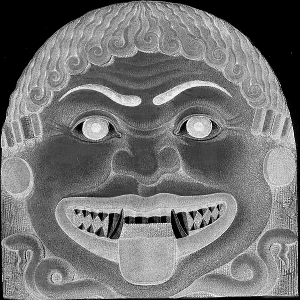

In [9]:
inverser_couleurs(tab_pixels)
creer_image(tab_pixels, "gorgone_inverse.pgm")
afficher("gorgone_inverse.pgm")

## Partie C - Redimensionnement

On souhaite diviser par deux les dimensions d'une image en ne conservant qu'une ligne de pixels sur deux et qu'une colonne de pixels sur deux.

**Question 7 :** Définir une procédure `diviser_par_deux` qui prend en paramètre d'entrée le nom d'un fichier image au format PGM et qui crée un nouveau fichier contenant l'image dont les dimensions ont été divisées par 2.

Par exemple, l'appel `diviser_par_deux("gorgone.pgm")` doit entraîner la création d'un fichier `s_gorgone.pgm` contenant l'image aux dimensions réduites.

In [10]:
def diviser_par_deux(nom_fichier):
    tab_pixels = extraire_pixels(nom_fichier)
    hauteur = len(tab_pixels)
    largeur = len(tab_pixels[0])
    nouveau_tab = [[tab_pixels[L][C] for C in range(largeur) if C % 2 == 0] for L in range(hauteur) if L % 2 == 0]
    creer_image(nouveau_tab, "s_" + nom_fichier)

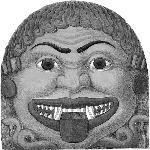

In [12]:
diviser_par_deux("gorgone.pgm")
afficher("s_gorgone.pgm")

## Partie D - Photomaton

On souhaite créer une image "photomaton" sur le modèle suivant :

<table>
    <tr>
        <td><img alt="Photomaton" src="https://ntoulzac.github.io/Cours-NSI-Premiere/devoirs/images/gorgone.png" width="40%"></td>
        <td><img alt="Photomaton" src="https://ntoulzac.github.io/Cours-NSI-Premiere/devoirs/images/photomaton_gorgone.png" width="40%"></td>
    </tr>
</table>

Pour obtenir ce résultat, on peut placer :
- en haut de l'image les lignes de pixels d'indice pair,
- en bas de l'image les lignes de pixels d'indice impair,
- à gauche de l'image les colonnes de pixels d'indice pair,
- à droite de l'image les colonnes de pixels d'indice impair.

**Question 8 :** Définir une procédure `photomaton` qui prend en paramètre d'entrée le nom d'un fichier image au format PGM et qui crée un nouveau fichier contenant l'image "photomaton".

Par exemple, l'appel `photomaton("gorgone.pgm")` doit entraîner la création d'un fichier `photomaton_gorgone.pgm` contenant l'image "photomaton".

In [15]:
def photomaton(nom_fichier):
    tab_pixels = extraire_pixels(nom_fichier)
    hauteur = len(tab_pixels)
    largeur = len(tab_pixels[0])
    nouveau_tab = ([([tab_pixels[L][C] for C in range(largeur) if C % 2 == 0]
                     + [tab_pixels[L][C] for C in range(largeur) if C % 2 == 1])
                   for L in range(hauteur) if L % 2 == 0]
                + [([tab_pixels[L][C] for C in range(largeur) if C % 2 == 0]
                     + [tab_pixels[L][C] for C in range(largeur) if C % 2 == 1])
                   for L in range(hauteur) if L % 2 == 1])
    creer_image(nouveau_tab, "photomaton_" + nom_fichier)

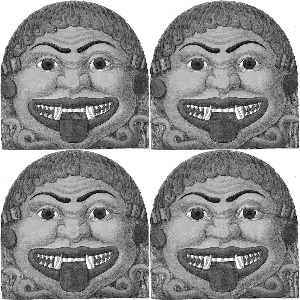

In [16]:
photomaton("gorgone.pgm")
afficher("photomaton_gorgone.pgm")